database: https://www.kaggle.com/code/krator/starter-calcofi-1dd1ee7d-2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'C:\Users\majal\Downloads\archive (4)\bottle.csv')
df.head()

C:\Users\majal\AppData\Local\Temp\ipykernel_71588\1666798958.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\majal\Downloads\archive (4)\bottle.csv')


Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  NaN  NaN                  NaN  
1     NaN   NaN   NaN  NaN  NaN  NaN  NaN                  NaN  
2     NaN   NaN   NaN  NaN  NaN  NaN  NaN                  NaN  
3     NaN   NaN   NaN  NaN  NaN  NaN  NaN                  NaN  
4     NaN   NaN   NaN  NaN  NaN  NaN  NaN                  NaN  

[5 rows x 74 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [4]:
df.shape

(864863, 74)

In [5]:
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [26]:
columns = [col for col in df.columns if (df[col].isnull().sum() / df.shape[0]) <= 0.05]
print(columns)

['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES']


In [8]:
df=df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      853900 non-null  float64
 6   Salnty      817509 non-null  float64
 7   STheta      812174 non-null  float64
 8   RecInd      864863 non-null  int64  
 9   T_prec      853900 non-null  float64
 10  S_prec      817509 non-null  float64
 11  NH3q        808299 non-null  float64
 12  C14A1q      848605 non-null  float64
 13  C14A2q      848623 non-null  float64
 14  DarkAq      840440 non-null  float64
 15  MeanAq      840439 non-null  float64
 16  R_Depth     864863 non-null  float64
 17  R_TEMP      853900 non-null  float64
 18  R_POTEMP    818816 non-null  float64
 19  R_

In [9]:
df.select_dtypes("object").head()

Sta_ID                                Depth_ID
0  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3
1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3
2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7
3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3
4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7

In [10]:
df.drop(["Sta_ID", "Depth_ID"], axis=1, inplace=True)

In [11]:
df.head()

Cst_Cnt  Btl_Cnt  Depthm  T_degC  Salnty  STheta  RecInd  T_prec  S_prec  \
0        1        1       0   10.50  33.440  25.649       3     1.0     2.0   
1        1        2       8   10.46  33.440  25.656       3     2.0     2.0   
2        1        3      10   10.46  33.437  25.654       7     2.0     3.0   
3        1        4      19   10.45  33.420  25.643       3     2.0     2.0   
4        1        5      20   10.45  33.421  25.643       7     2.0     3.0   

   NH3q  ...  DarkAq  MeanAq  R_Depth  R_TEMP  R_POTEMP  R_SALINITY  R_SIGMA  \
0   9.0  ...     9.0     9.0      0.0   10.50     10.50      33.440    25.64   
1   9.0  ...     9.0     9.0      8.0   10.46     10.46      33.440    25.65   
2   9.0  ...     9.0     9.0     10.0   10.46     10.46      33.437    25.65   
3   9.0  ...     9.0     9.0     19.0   10.45     10.45      33.420    25.64   
4   9.0  ...     9.0     9.0     20.0   10.45     10.45      33.421    25.64   

   R_SVA  R_DYNHT  R_PRES  
0  233.0     0.00       0  
1  232.5     0.01       8  
2  232.8     0.02      10  
3  234.1     0.04      19  
4  234.0     0.04      20  

[5 rows x 22 columns]

In [12]:
df.isnull().sum()

Cst_Cnt           0
Btl_Cnt           0
Depthm            0
T_degC        10963
Salnty        47354
STheta        52689
RecInd            0
T_prec        10963
S_prec        47354
NH3q          56564
C14A1q        16258
C14A2q        16240
DarkAq        24423
MeanAq        24424
R_Depth           0
R_TEMP        10963
R_POTEMP      46047
R_SALINITY    47354
R_SIGMA       52856
R_SVA         52771
R_DYNHT       46657
R_PRES            0
dtype: int64

In [13]:
df.shape

(864863, 22)

In [14]:
df.dropna(axis=0, inplace=True)

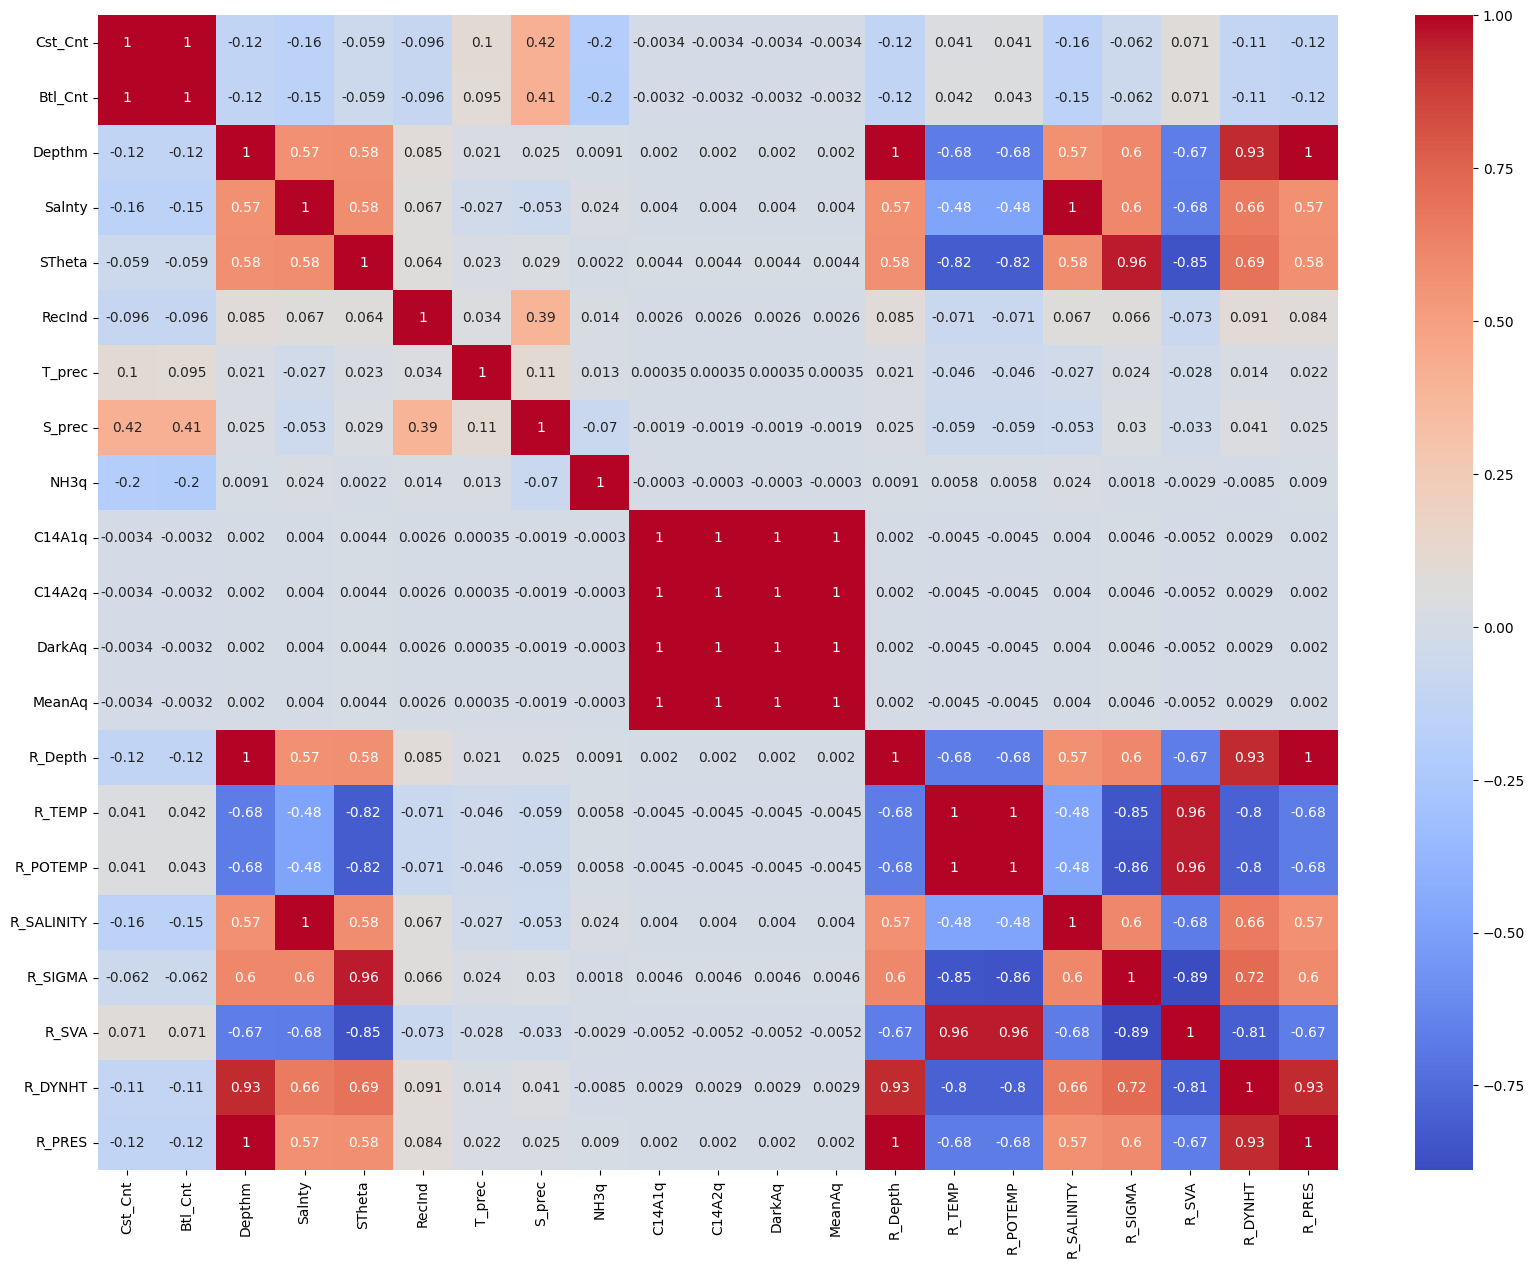

In [32]:
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

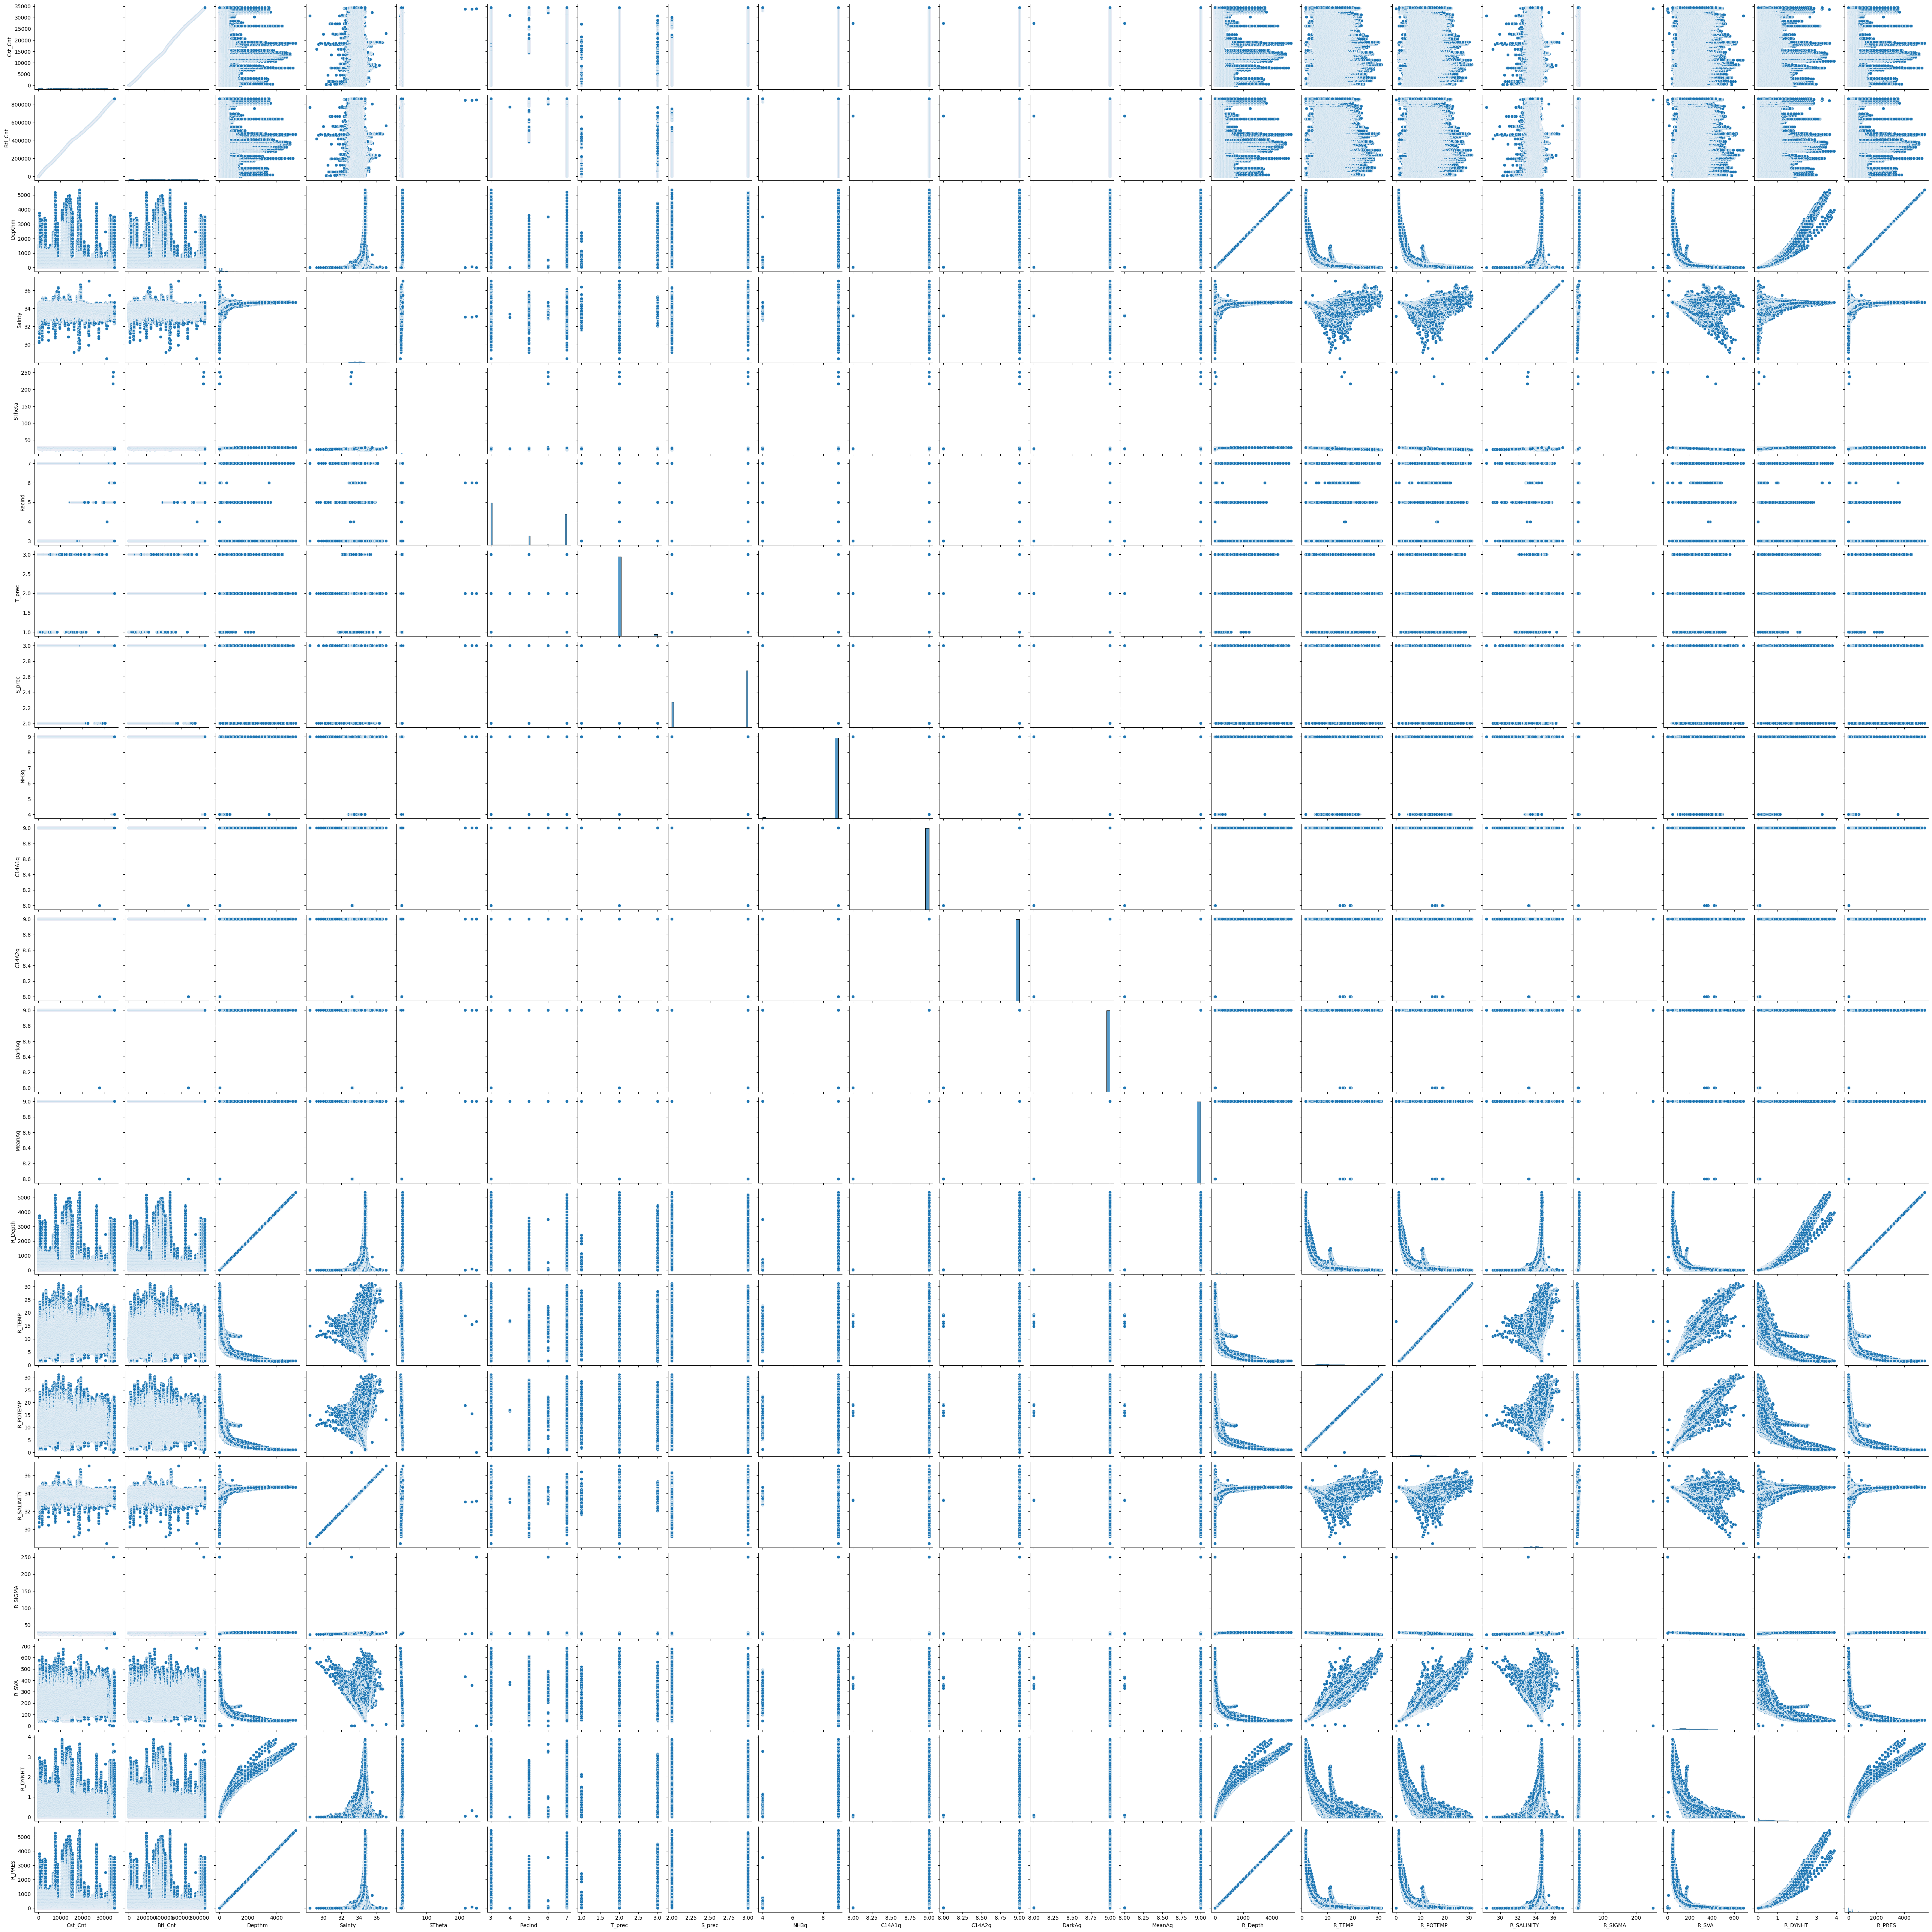

In [29]:
sns.pairplot(df)
plt.show()

In [15]:
y=df[["T_degC"]]
df.drop(columns=["T_degC"], inplace=True)
X=df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((586734, 21), (146684, 21), (586734, 1), (146684, 1))

In [17]:
def transform_train_val(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [18]:
X_train, X_test = transform_train_val(X_train, X_test)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:

y_train_pred = model.predict(X_train)
print(r2_score(y_train, y_train_pred))

0.9999999929649095


In [24]:
y_pred_val = model.predict(X_test)
r2_score(y_test, y_pred_val)

0.999999993041073